# Hola Sebastián! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy buen trabajo Sebastián, tu notebook está muy completo y ordenado. Está todo lo necesario para aprobar el notebook, no tengo ningún comentario adicinoal a realizar, tan solo difiero en un par de ocasiones del uso de gráfico de líneas. Muy bien!
</div>

----

# Métodos numéricos ML - Valor de mercado automóvil 

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

<h1>Contenido:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparación-de-datos" data-toc-modified-id="Preparación-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparación de datos</a></span><ul class="toc-item"><li><span><a href="#Exploración-de-datos" data-toc-modified-id="Exploración-de-datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploración de datos</a></span></li><li><span><a href="#Codificación-y-estandarización-de-datos" data-toc-modified-id="Codificación-y-estandarización-de-datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Codificación y estandarización de datos</a></span></li><li><span><a href="#Escalar-los-datos" data-toc-modified-id="Escalar-los-datos-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Escalar los datos</a></span></li><li><span><a href="#Segmentación-de-datos" data-toc-modified-id="Segmentación-de-datos-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Segmentación de datos</a></span></li></ul></li><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span><ul class="toc-item"><li><span><a href="#Modelo-de-regresión-lineal" data-toc-modified-id="Modelo-de-regresión-lineal-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modelo de regresión lineal</a></span></li><li><span><a href="#Modelo-de-bosque-aleatorio" data-toc-modified-id="Modelo-de-bosque-aleatorio-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Modelo de bosque aleatorio</a></span></li><li><span><a href="#Potenciador-de-gradiente" data-toc-modified-id="Potenciador-de-gradiente-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Potenciador de gradiente</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Análisis-del-modelo" data-toc-modified-id="Análisis-del-modelo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análisis del modelo</a></span><ul class="toc-item"><li><span><a href="#Prueba-de-LightGBM-con-datos-de-prueba" data-toc-modified-id="Prueba-de-LightGBM-con-datos-de-prueba-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prueba de LightGBM con datos de prueba</a></span></li></ul></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusión</a></span></li></ul></div>

## Preparación de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#importo processing para etiquetas, onehot y escalar datos
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# importo los modelos a utilizar
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#importo las métricas para evaluar los modelos 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report 

#importo time
import time

In [2]:
#uso pd.read_csv para cargar los datos
df = pd.read_csv('/datasets/car_data.csv')

### Exploración de datos

In [3]:
# uso info para explorar los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

**Observacion:** Existen columnas con valores ausentes como. `VehicleType`,  `Model`, `FuelType`, `NotRepaired`

In [4]:
# uso head para visualizar los datos 
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [5]:
# examino los valores ausentes
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

**Observación:**

**Las columnas `VehicleType`, `Gearbox`, `Model`, `FuelType` y `NotRepaired` contienen valores ausentes**, se eliminarán de los datos ya que estos pueden afectar la precisión del modelo. 

In [6]:
# uso dropna junto con inplace para eliminar los datos con valores ausentes
df.dropna(inplace=True)

In [7]:
# verifico que ya no hay valores ausentes
df.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [8]:
# verifico si hay valores duplicados
df.duplicated().sum()

247

In [9]:
# elimino los datos duplicados del modelo con el uso de drop_duplicates
df.drop_duplicates(inplace=True)

In [10]:
# reviso que ya no existan duplicados
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245567 entries, 3 to 354367
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        245567 non-null  object
 1   Price              245567 non-null  int64 
 2   VehicleType        245567 non-null  object
 3   RegistrationYear   245567 non-null  int64 
 4   Gearbox            245567 non-null  object
 5   Power              245567 non-null  int64 
 6   Model              245567 non-null  object
 7   Mileage            245567 non-null  int64 
 8   RegistrationMonth  245567 non-null  int64 
 9   FuelType           245567 non-null  object
 10  Brand              245567 non-null  object
 11  NotRepaired        245567 non-null  object
 12  DateCreated        245567 non-null  object
 13  NumberOfPictures   245567 non-null  int64 
 14  PostalCode         245567 non-null  int64 
 15  LastSeen           245567 non-null  object
dtypes: int64(7), object(

In [12]:
# elimino las columnas no necesarias para determinar el precio
df = df.drop(['DateCrawled','RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis = 1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no


In [13]:
# uso describe para evaluar valores atípicos en los datos
df.describe()

,Price,RegistrationYear,Power,Mileage
count,245567.000000,245567.000000,245567.000000,245567.000000
mean,5125.680959,2002.918287,119.971796,127297.112397
std,4718.468928,6.164689,139.448062,37079.536493
min,0.000000,1910.000000,0.000000,5000.000000
25%,1499.000000,1999.000000,75.000000,125000.000000
50%,3500.000000,2003.000000,110.000000,150000.000000
75%,7500.000000,2007.000000,150.000000,150000.000000
max,20000.000000,2018.000000,20000.000000,150000.000000


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, muy bien hasta aquí
</div>

**Observación valores atípicos:**

**Tanto `Price` como `Power` tienen valores mínimos en 0** esto puede indicar datos que no fueron registrados debidamente y que afectaran la calidad de las predicciones. 

In [14]:
# imprimo los valores que tengan power o price iguales a 0
print('Price = 0:', df[df['Price']==0].shape)
print('Power = 0:',df[df['Power']==0].shape)

Price = 0: (3386, 10)
Power = 0: (9611, 10)


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, estos son valores atípicos
</div>

In [15]:
# elimino todos los registros donde price o power es 0

df = df[df['Price']!=0].reset_index(drop=True)
df = df[df['Power']!=0].reset_index(drop=True)

In [16]:
df.head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
1,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
2,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
3,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
4,2000,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
5,2799,wagon,2005,manual,140,passat,150000,gasoline,volkswagen,yes
6,17999,suv,2011,manual,190,navara,70000,gasoline,nissan,no
7,1750,small,2004,auto,75,twingo,150000,petrol,renault,no
8,7550,bus,2007,manual,136,c_max,150000,gasoline,ford,no
9,1850,bus,2004,manual,102,a_klasse,150000,petrol,mercedes_benz,no


In [17]:
# uso describe para verificar los nuevos valores
df.describe()

,Price,RegistrationYear,Power,Mileage
count,233029.000000,233029.000000,233029.000000,233029.000000
mean,5291.863219,2003.088148,124.824739,127018.568504
std,4729.981297,6.082840,137.559774,37079.072487
min,1.000000,1910.000000,1.000000,5000.000000
25%,1555.000000,1999.000000,82.000000,125000.000000
50%,3690.000000,2004.000000,116.000000,150000.000000
75%,7750.000000,2007.000000,150.000000,150000.000000
max,20000.000000,2018.000000,20000.000000,150000.000000


**Observación General:**

La tabla de características contiene 9 columnas:

`VehicleType`, `RegistrationYear`, `Gearbox`, `Power`, `Model`, `FuelType` y `Brand` nos permiten conocer información sobre las características del vehículo. Adicional a esto las columnas `Mileage` y `NotRepaired` nos brindan información sobre la vida útil del vehículo y su expectativa de uso, de esta forma se podrá analizar los datos por marca, año y estado para encontrar patrones que determinen los precios.

Por último `Price` nos permite conocer el precio de mercado en euros el cual será nuestro objetivo de análisis.

- la tabla contiene información de 233,029 datos.
- el promedio de precio es 5,292 €.
- el promedio de kilometraje es de 127,000 km.
- en promedio el año modelo es 2003. 

**Limpieza y procesamiento de datos:**

-  Las columnas `VehicleType`, `Gearbox`, `Model`, `FuelType` y `NotRepaired` contenían valores ausentes, **se eliminaron para mejorar la calidad del modelo.**

- Se encontraron **247 datos duplicados que corresponden al 0.09% los cuales fueron eliminados.**

- Se encontraron valores **atípicos donde Price y Power eran 0**, estos se eliminaron de igual manera.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, buen trabajo en esta primera parte.
</div>

### Codificación y estandarización de datos

In [18]:
# uso get_dummies en gearbox para realizar codificación one-hot, uso drop_first = True
# 0 para auto y 1 para manual

df['Gearbox'] = pd.get_dummies(df['Gearbox'], drop_first=True)

# uso get_dummies en NotRepaired para realizar codificación one-hot, uso drop_first = True
# 0 para no y 1 para yes

df['NotRepaired'] = pd.get_dummies(df['NotRepaired'], drop_first=True)

In [19]:
#uso Lable enconder para transformar las comunas categorías a numéricas

df['VehicleType'] = OrdinalEncoder().fit_transform(df[['VehicleType']])
df['Model'] = OrdinalEncoder().fit_transform(df[['Model']])
df['FuelType'] = OrdinalEncoder().fit_transform(df[['FuelType']])
df['Brand'] = OrdinalEncoder().fit_transform(df[['Brand']])

In [20]:
# verifico que la codificacion y estiquetado sea correcto
df.head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,1500,5.0,2001,1,75,116.0,150000,6.0,37.0,0
1,3600,5.0,2008,1,69,101.0,90000,2.0,31.0,0
2,650,4.0,1995,1,102,11.0,150000,6.0,2.0,1
3,2200,1.0,2004,1,109,8.0,150000,6.0,25.0,0
4,2000,4.0,2004,1,105,10.0,150000,6.0,19.0,0
5,2799,7.0,2005,1,140,170.0,150000,2.0,37.0,1
6,17999,6.0,2011,1,190,159.0,70000,2.0,23.0,0
7,1750,5.0,2004,0,75,226.0,150000,6.0,27.0,0
8,7550,0.0,2007,1,136,60.0,150000,2.0,10.0,0
9,1850,0.0,2004,1,102,33.0,150000,6.0,20.0,0


**Observación:**

- Se utilizó **codificación one-hot** en las columnas **`Gearbox` y `NotRepaired`** para poder analizarlas correctamente.

- De igual manera **se utilizó etiquetado de datos con OrdinalEncoder()** en las columnas `VehicleType`, `Model`, `FuelType`, `Brand`


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, correcto. Ojo con OrdinalEncoder, a veces puede generar aprendizajes indeaseados en los modelos (en las clases que no hay un orden inherente, el modelo podría aprender que un valor categórico es "más grande" que otro, lo que no tiene sentido), pero en este caso, son pocos los valores diferentes en las columnas categóricas.
</div>

### Escalar los datos

In [21]:
#defino las columnas a esacalar en una lista
feature_names = ['VehicleType', 'RegistrationYear', 'Gearbox', 'Power','Model', 'Mileage', 'FuelType', 'Brand', 'NotRepaired']

#uso MaxAbsScaler para escalar los datos de las columnas indicadas
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

# creo df_scaled para almacenar los nuevos datos en sus respectivas columnas
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [22]:
# verifico que el escalado se haya realizado correctamente
df_scaled.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,1500,0.714286,0.991576,1.0,0.00375,0.467742,1.0,1.000000,0.973684,0.0
1,3600,0.714286,0.995045,1.0,0.00345,0.407258,0.6,0.333333,0.815789,0.0
2,650,0.571429,0.988603,1.0,0.00510,0.044355,1.0,1.000000,0.052632,1.0
3,2200,0.142857,0.993062,1.0,0.00545,0.032258,1.0,1.000000,0.657895,0.0
4,2000,0.571429,0.993062,1.0,0.00525,0.040323,1.0,1.000000,0.500000,0.0


**Observación:**
- **Se utilizó MaxAbsScaler() para escalar los datos** de las columnas a usar en el modelo.

- **Esto evitara que el modelo pueda exagerar la importancia de escalas grandes** como Kilometraje o año de registro en sus predicciones.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

### Segmentación de datos

In [23]:
# creo las tablas de características y de objetivo
features = df_scaled.drop(['Price'], axis = 1)
target = df_scaled['Price']

In [24]:
# verifico la tabla de características 
features.head(5)

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,0.714286,0.991576,1.0,0.00375,0.467742,1.0,1.000000,0.973684,0.0
1,0.714286,0.995045,1.0,0.00345,0.407258,0.6,0.333333,0.815789,0.0
2,0.571429,0.988603,1.0,0.00510,0.044355,1.0,1.000000,0.052632,1.0
3,0.142857,0.993062,1.0,0.00545,0.032258,1.0,1.000000,0.657895,0.0
4,0.571429,0.993062,1.0,0.00525,0.040323,1.0,1.000000,0.500000,0.0


In [25]:
# verifico target
target.head()

0    1500
1    3600
2     650
3    2200
4    2000
Name: Price, dtype: int64

In [26]:
#uso train_test_split para dividir los datos en entrenamiento y prueba con 20%
features_train, features_test, target_train, target_test =train_test_split(features,target,test_size=0.2,random_state=12345)

#uso train_test_split para dividir los datos en entrenamiento y validación con 25%
features_train, features_valid, target_train, target_valid =train_test_split(features_train,target_train,test_size=.25,random_state=12345)

In [27]:
# verifico el tamaño de los segmentos de prueba
print('features_train:', features_train.shape)
print('target_train:', target_train.shape)

print('')
print('features_valid', features_valid.shape)
print('target_valid', target_valid.shape)

print('')
print('features_test', features_test.shape)
print('target_test', target_test.shape)

features_train: (139817, 9)
target_train: (139817,)

features_valid (46606, 9)
target_valid (46606,)

features_test (46606, 9)
target_test (46606,)


**Observación:**
- Los tamaños de **cada segmento corresponden a 60% para entrenamiento, 20% prueba y 20% validación.**
- Los segmentos de características tienen las columnas: `VehicleType`, `RegistrationYear`, `Gearbox`, `Power`, `Model`, `Mileage`, `FuelType`, `Brand`, `NotRepaired`
- Los segmentos de objetivo solo tienen la columna `Price`.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, muy bien!
</div>

## Entrenamiento del modelo 

### Modelo de regresión lineal

Descripcion de proyecto: "La regresión lineal no es muy buena para el ajuste de hiperparámetros, pero es perfecta para hacer una prueba de cordura de otros métodos."

In [28]:
#creo el modelo de regresión lineal
lr = LinearRegression()

#creo time.time() alrededor de model.fit para calcular el tiempo de entrenamiento
start_t = time.time()
lr.fit(features_train, target_train)
lr_train_time = time.time() - start_t

#creo time.time() alrededor de model.predict para calcular el tiempo de predicción
start_p = time.time()
lr_predict = lr.predict(features_valid)
lr_pred_time = time.time() - start_p

#calculo RMSE & R2
lr_rmse = mean_squared_error(target_valid, lr_predict)**0.5
lr_r2 = r2_score(target_valid, lr_predict)

# imprimo los resultados de rmse, r2 y tiempo de entrenamiento y prediccion
float_formatter = "{:.2}".format

print('RMSE:', lr_rmse)
print('R2:', lr_r2)
print('')
print('Tiempo entrenamiento:', lr_train_time)
print('Tiempo predicción:', lr_pred_time)

RMSE: 3361.2678793981067
R2: 0.49710852538018946

Tiempo entrenamiento: 0.04583597183227539
Tiempo predicción: 0.002811908721923828


In [29]:
#uso %%timeit para confirmar los resultados
#lr_check = LinearRegression()
#%timeit lr_check.fit(features_train, target_train)
#%timeit lr_check.predict(features_valid)

In [30]:
print('Tiempo entrenamiento promedio:')
print('53.3 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)')
print('')
print('Tiempo predicción promedio:')
print('8.98 ms ± 935 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)')

#almaceno los tiempos promedios para comparar los modelos más adelante todo en s
lr_train = 53.3/1000
lr_pred = 8.98/1000

Tiempo entrenamiento promedio:
53.3 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Tiempo predicción promedio:
8.98 ms ± 935 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Regresión Lineal Observaciones:**
- El valor de **RMSE es 3361 € y R2 es 0.50**, esto nos indica que **la regresión no es muy acertada con sus predicciones**, pero servirá como base para la comparación de otros modelos.
- El modelo de regresión tarda en promedio **53.3 ms para entrenamiento.**
- El modelo de regresión tarda en promedio **8.98 ms para realizar predicciones.**

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

### Modelo de bosque aleatorio

In [31]:
#creo el modelo de bosque aleatorio
model = RandomForestRegressor(max_depth=25, random_state=12345)

#creo time.time() alrededor de model.fit para calcular el tiempo de entrenamiento
start_t = time.time()
model.fit(features_train, target_train)
rf_train_time = time.time() - start_t

#creo time.time() alrededor de model.predict para calcular el tiempo de predicción
start_p = time.time()
model_predict = model.predict(features_valid)
rf_pred_time = time.time() - start_p

#calculo RMSE & R2
rf_rmse = mean_squared_error(target_valid, model_predict)**0.5
rf_r2 = r2_score(target_valid, model_predict)

# imprimo los resultados de rmse, r2 y tiempo de entrenamiento y predicción
print('RMSE:', rf_rmse)
print('R2:', rf_r2)
print('')
print('Tiempo entrenamiento:', rf_train_time)
print('Tiempo predicción:', rf_pred_time)

RMSE: 1597.9999000240878
R2: 0.8863363709400939

Tiempo entrenamiento: 42.28597450256348
Tiempo predicción: 1.6429975032806396


In [32]:
# comprobar los resultados con el uso de %timeit - OK

#rf_check = RandomForestRegressor(max_depth=25, random_state=12345)
#%timeit -n 1 -r 3 model.fit(features_train, target_train)
#%timeit -n 1 -r 3 model.predict(features_valid)

In [33]:
print('Tiempo entrenamiento promedio:')
print('40.8 s ± 273 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)')
print('Tiempo predicción promedio:')
print('1.67 s ± 8.68 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)')

#almaceno los tiempos promedios para comparar los modelos más adelante
rf_train = 40.8
rf_pred = 1.67


Tiempo entrenamiento promedio:
40.8 s ± 273 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Tiempo predicción promedio:
1.67 s ± 8.68 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


**Bosque aleatorio observaciones:**

- El valor de **RMSE disminuyó a 1598 € y R2  aumentó a 0.89**, es un modelo mucho más acertado en sus predicciones, sin embargo tiene tiempos mucho mayores en comparación a la regresión lineal, además a la compañía le interesa un modelo que minimice la espera de los usuarios en la app.
- El modelo de bosque aleatorio tarda en promedio **40.8 s para entrenamiento.**
- El modelo de bosque aleatorio tarda en promedio **1.67 s para realizar predicciones.**

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

### Potenciador de gradiente

In [34]:
#creo el modelo de potenciador de gradiente y defino los hiperparámetros
model = GradientBoostingRegressor(n_estimators=40, max_depth=25, random_state=12345)

#creo time.time() alrededor de model.fit para calcular el tiempo de entrenamiento
start_time = time.time()
model.fit(features_train, target_train)
gb_train_time = time.time() - start_time

#creo time.time() alrededor de model.predict para calcular el tiempo de predicción
start_time = time.time()
model_predict = model.predict(features_valid)
gb_pred_time = time.time() - start_time

#calculo RMSE & R2
gb_rmse = mean_squared_error(target_valid, model_predict)**0.5
gb_r2 = r2_score(target_valid, model_predict)

# imprimo los resultados de rmse, r2 y tiempo de entrenamiento y predicción
print("RMSE:", gb_rmse)
print("R2:", gb_r2)
print('')
print("Tiempo entrenamiento:", gb_train_time)
print("Tiempo predicción:", gb_pred_time)

RMSE: 1843.380299439872
R2: 0.8487491214079157

Tiempo entrenamiento: 27.051328659057617
Tiempo predicción: 0.7235283851623535


In [35]:
# comprobar los resultados con el uso de %timeit - OK

#gb_check = GradientBoostingRegressor(n_estimators=40, max_depth=25, random_state=12345)
#%timeit -n 1 -r 3 gb_check.fit(features_train, target_train)
#%timeit -n 1 -r 3 gb_check.predict(features_valid)

In [36]:
print('Tiempo entrenamiento promedio:')
print('28.2 s ± 193 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)')
print('Tiempo predicción promedio:')
print('724 ms ± 15.4 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)')

#almaceno los tiempos promedios para comparar los modelos más adelante (todo en segundos)
gb_train = 28.2
gb_pred = 724/1000 

Tiempo entrenamiento promedio:
28.2 s ± 193 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Tiempo predicción promedio:
724 ms ± 15.4 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


**GradientBoosting observaciones:**

- El valor de **RMSE es 1843 € y R2 es 0.85**, es un modelo menos acertado que el bosque aleatorio, sin embargo tiene tiempos mucho más eficientes en comparación ya que reduce el tiempo de entrenamiento a la mitad y es más rápido para hacer predicciones sin sacrificar mucho RMSE y R2.

- El modelo de GradientBoosting tarda en promedio **28.2 s para entrenamiento.**
- El modelo de GradientBoosting tarda en promedio **724 ms para realizar predicciones.**

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

### LightGBM

In [37]:
# creo el modelo de lightGBM Regressor y defino los hiperparametros
model_lgb = LGBMRegressor(boosting_type='gbdt',
                          learning_rate=0.15, 
                          n_estimators=80, 
                          random_state=12345)


#creo time.time() alrededor de model.fit para calcular el tiempo de entrenamiento
start_time = time.time()
model_lgb.fit(features_train, target_train)
lgbm_train_time = time.time() - start_time

#creo time.time() alrededor de model.predict para calcular el tiempo de predicción
start_time = time.time()
model_predict = model_lgb.predict(features_valid)
lgbm_pred_time = time.time() - start_time

#calculo RMSE & R2
lgbm_rmse = mean_squared_error(target_valid, model_predict)**0.5
lgbm_r2 = r2_score(target_valid, model_predict)

# imprimo los resultados de rmse, r2 y tiempo de entrenamiento y predicción
print("RMSE:", lgbm_rmse)
print("R2:", lgbm_r2)
print('')
print("Tiempo entrenamiento:", lgbm_train_time)
print("Tiempo predicción::", lgbm_pred_time)

RMSE: 1649.9580888356375
R2: 0.8788247713522173

Tiempo entrenamiento: 1.6968955993652344
Tiempo predicción:: 0.3112635612487793


In [38]:
# comprobar los resultados con el uso de %timeit - OK

#lgb_check = LGBMRegressor(boosting_type='gbdt', learning_rate=0.15, n_estimators=80, random_state=12345)
#%timeit -n 1 -r 3 lgb_check.fit(features_train, target_train)
#%timeit -n 1 -r 3 lgb_check.predict(features_valid)

In [39]:
print('Tiempo entrenamiento promedio:')
print('1.68 s ± 89.1 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)')
print('Tiempo predicción promedio:')
print('338 ms ± 32.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)')

#almaceno los tiempos promedios para comparar los modelos más adelante (todo en segundos)
lgbm_train = 1.68
lgbm_pred = 338/1000 

Tiempo entrenamiento promedio:
1.68 s ± 89.1 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Tiempo predicción promedio:
338 ms ± 32.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


**LightGBM Observaciones:**

- El valor de **RMSE es 1650 € y R2 es 0.88**, **es un modelo casi tan acertado como el bosque aleatorio**, sin embargo  **tiene tiempos notablemente más eficientes** en comparación lo cual puede alinearse a las expectativas de la compañía.

- El modelo de lightGBM tarda en promedio **1.68 s para entrenamiento.**
- El modelo de lightGBM tarda en promedio **338 ms para realizar predicciones.**

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

### CatBoost

In [40]:
# creo el modelo de catboost y defino los hiperparametros
model_cat = CatBoostRegressor(iterations=200,
                          learning_rate=0.1,
                          depth=5,
                          l2_leaf_reg=4,
                          random_seed=12345)


#creo time.time() alrededor de model.fit para calcular el tiempo de entrenamiento
start_time = time.time()
model_cat.fit(features_train, target_train)
cat_train_time = time.time() - start_time

#creo time.time() alrededor de model.predict para calcular el tiempo de predicción
start_time = time.time()
model_predict = model_cat.predict(features_valid)
cat_pred_time = time.time() - start_time

#calculo RMSE & R2
cat_rmse = mean_squared_error(target_valid, model_predict)**0.5
cat_r2 = r2_score(target_valid, model_predict)

# imprimo los resultados de rmse, r2 y tiempo de entrenamiento y predicción
print('')
print("RMSE:", cat_rmse)
print("R2:", cat_r2)
print('')
print("Tiempo entrenamiento:", cat_train_time)
print("Tiempo predicción:", cat_pred_time)

0:	learn: 4409.0330653	total: 72.8ms	remaining: 14.5s
1:	learn: 4138.1537507	total: 96.4ms	remaining: 9.54s
2:	learn: 3888.6228704	total: 120ms	remaining: 7.85s
3:	learn: 3671.4919577	total: 142ms	remaining: 6.96s
4:	learn: 3482.5036020	total: 164ms	remaining: 6.41s
5:	learn: 3317.3663392	total: 188ms	remaining: 6.07s
6:	learn: 3173.3624266	total: 211ms	remaining: 5.82s
7:	learn: 3043.8200902	total: 234ms	remaining: 5.61s
8:	learn: 2934.7281796	total: 257ms	remaining: 5.44s
9:	learn: 2838.7407830	total: 280ms	remaining: 5.33s
10:	learn: 2756.4939943	total: 304ms	remaining: 5.22s
11:	learn: 2679.9084540	total: 326ms	remaining: 5.11s
12:	learn: 2613.8097786	total: 348ms	remaining: 5.01s
13:	learn: 2554.1241462	total: 370ms	remaining: 4.92s
14:	learn: 2500.8392038	total: 395ms	remaining: 4.87s
15:	learn: 2455.4563016	total: 416ms	remaining: 4.79s
16:	learn: 2417.4268755	total: 438ms	remaining: 4.71s
17:	learn: 2379.9152398	total: 461ms	remaining: 4.67s
18:	learn: 2348.1464593	total: 482ms

153:	learn: 1758.7271604	total: 3.47s	remaining: 1.04s
154:	learn: 1757.7051045	total: 3.49s	remaining: 1.01s
155:	learn: 1756.1660208	total: 3.52s	remaining: 994ms
156:	learn: 1755.6070799	total: 3.55s	remaining: 972ms
157:	learn: 1754.6936210	total: 3.57s	remaining: 950ms
158:	learn: 1753.9013185	total: 3.6s	remaining: 928ms
159:	learn: 1753.0105057	total: 3.62s	remaining: 905ms
160:	learn: 1752.4966685	total: 3.64s	remaining: 882ms
161:	learn: 1751.2260073	total: 3.66s	remaining: 859ms
162:	learn: 1750.2411680	total: 3.68s	remaining: 836ms
163:	learn: 1749.6504519	total: 3.71s	remaining: 814ms
164:	learn: 1748.7494378	total: 3.73s	remaining: 791ms
165:	learn: 1748.3058677	total: 3.75s	remaining: 768ms
166:	learn: 1747.2718252	total: 3.78s	remaining: 746ms
167:	learn: 1745.7280603	total: 3.8s	remaining: 725ms
168:	learn: 1745.1148893	total: 3.83s	remaining: 702ms
169:	learn: 1744.3304827	total: 3.85s	remaining: 679ms
170:	learn: 1743.4351578	total: 3.87s	remaining: 656ms
171:	learn: 

In [41]:
# comprobar los resultados con el uso de %timeit - OK

#cat_check = model_cat = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=5, l2_leaf_reg=4, random_seed=12345)
#%timeit -n 1 -r 3 cat_check.fit(features_train, target_train)
#%timeit -n 1 -r 3 cat_check.predict(features_valid)

In [42]:
print('Tiempo entrenamiento Promedio:')
print('4.83 s ± 146 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)')
print('Tiempo predicción Promedio:')
print('15.9 ms ± 522 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)')

#almaceno los tiempos promedios para comparar los modelos más adelante (todo en segundos)
cat_train = 4.83
cat_pred = 15.9/1000 

Tiempo entrenamiento Promedio:
4.83 s ± 146 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Tiempo predicción Promedio:
15.9 ms ± 522 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)


**CatBoost Observaciones:**

- El valor de **RMSE es 1737 € y R2 es 0.87**, es ligeramente menos acertado que lightGBM, sin embargo **regresa a un tiempo más lento de entrenamiento y predicción** en comparación.

- El modelo de CatBoost tarda en promedio **4.83 s para entrenamiento.**
- El modelo de CatBoost tarda en promedio **15.9 ms para realizar predicciones.**


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

## Análisis del modelo

In [43]:
#creo un dataframe para los resultados
model_compare = pd.DataFrame({
    'modelo':['Regresión Lineal', 'Bosque aleatorio', 'Potenciador de Gradiente', 'LightGBM', 'CatBoost'],
    'RMSE':[lr_rmse, rf_rmse, gb_rmse,lgbm_rmse, cat_rmse],
    'R2':[lr_r2, rf_r2, gb_r2,lgbm_r2, cat_r2],
    'T. Entrenamiento (s)':[lr_train,rf_train,gb_train, lgbm_train, cat_train],
    'T. Predicción (s)':[lr_pred,rf_pred, gb_pred, lgbm_pred, cat_pred]
    }
)

# ajusto el formato de las columnas  RMSE y R2
model_compare['RMSE'] =round(model_compare['RMSE'],1)
model_compare['R2'] =round(model_compare['R2'],2)

model_compare_RMSE = model_compare.sort_values(by='RMSE', ascending= True )
model_compare_RMSE


,modelo,RMSE,R2,T. Entrenamiento (s),T. Predicción (s)
1,Bosque aleatorio,1598.0,0.89,40.8000,1.67000
3,LightGBM,1650.0,0.88,1.6800,0.33800
4,CatBoost,1737.4,0.87,4.8300,0.01590
2,Potenciador de Gradiente,1843.4,0.85,28.2000,0.72400
0,Regresión Lineal,3361.3,0.50,0.0533,0.00898


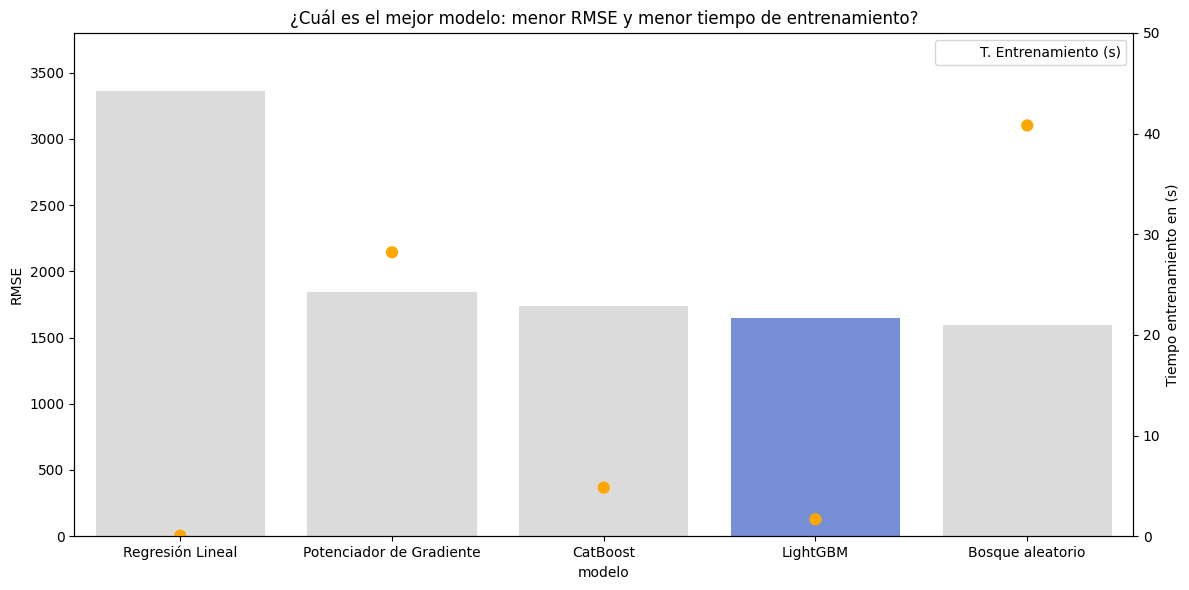

In [44]:
# creo una dataframe para comparar los modelos por RMSE
model_compare_RMSE = model_compare.sort_values(by='RMSE', ascending= False)
model_compare_RMSE

# creo subplots para graficar RMSE vs tiempo de entrenamiento
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx() # secondary y-axis

# defino los colores para la grafica
colors = ['#d3d3d3', '#d3d3d3', '#d3d3d3', '#4169e1', '#d3d3d3']


# gráfico el RMSE para cada modelo de barras 
sb.barplot(x='modelo', 
           y='RMSE', 
           palette = colors,
           data=model_compare_RMSE,
           ax=ax1, 
           alpha = 0.8) 

#creo la línea para comparar el tiempo de entrenamiento de cada modelo
ax2 = sb.pointplot(x='modelo',
             y='T. Entrenamiento (s)',
             color= '#ffa700',
             data= model_compare_RMSE,
             ax=ax2,
             linestyles ='',
             markers='o', 
             legend = True) 


ax1.set_ylim(0,3800)                                   #defino el limite del eje 1
ax2.set_ylim(0,50)                                     #defino el limite del eje 2
ax2.set_ylabel("Tiempo entrenamiento en (s)")          #nombre eje 2

plt.title("¿Cuál es el mejor modelo: menor RMSE y menor tiempo de entrenamiento?")    #asigno un titulo
plt.legend(title='', loc='upper right', labels=['T. Entrenamiento (s)'])              #creo una leyenda
plt.tight_layout()
plt.show()

**Observaciones:**
- Los **modelos que minimizan el RMSE son el `bosque aleatorio` y `lightGBM` con ~1600 €**


- No obstante, **el `bosque aleatorio` es un modelo que requiere mucho tiempo para ser entrenado 41s**, casi 20 veces más que lightGMB ~2s.


- **Podemos ver que el mejor modelo para la compañía es lightGBM** dada su precisión y velocidad, esto **tiene sentido ya que este algoritmo utiliza un enfoque secuencial para mejorar cada árbol nuevo vs el anterior minimizando el error** lo que le permite trabajar con datos complejos de forma efectiva.


<AxesSubplot:title={'center':'Tiempo de entrenamiento y de predicción para cada modelo'}, xlabel='Modelo', ylabel='Tiempo en segundos'>

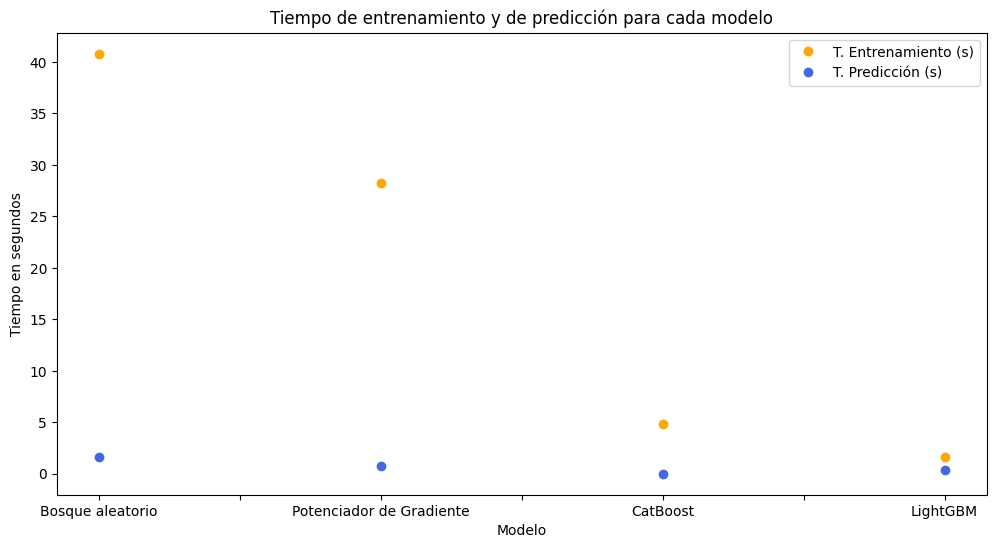

In [45]:
#creo un dataframe para comparar tiempo de entrenamiento y predicción
model_compare_time = model_compare.sort_values(by='T. Entrenamiento (s)', ascending = False)
model_compare_time = model_compare_time[model_compare_time['modelo'] != 'Regresión Lineal']

#creo un gráfico de líneas para ambos tiempos
model_compare_time.plot(kind='line',
                        x= 'modelo',
                        y= ['T. Entrenamiento (s)','T. Predicción (s)'],
                        figsize = (12,6),
                        legend = True,
                        title = 'Tiempo de entrenamiento y de predicción para cada modelo',
                        color = ['#ffa700','#4169e1'],
                        ylabel = 'Tiempo en segundos',
                        xlabel = 'Modelo',
                        style='o',
                        linewidth=2
                        )


**Observaciones:**
- Podemos observar que el `bosque aleatorio` y `potenciador de gradiente` son los modelos que **tienen un mayor tiempo de entrenamiento y no son recomendados para la compañía**.


- **LightGBM y CatBoost tienen los menores tiempos de entrenamiento** (4.83s y 1.6s) ambos tienen tiempos de predicción similares.


- **LightGBM se destaca como el mejor modelo para precisión/eficiencia** ya que obtiene los mejores RMSE y R2 sin sacrificar la velocidad de entrenamiento y predicción.



### Prueba de LightGBM con datos de prueba

In [46]:
#uso el modelo lightGBM Regressor y defino los hiperparametros
model_lgb = LGBMRegressor(boosting_type='gbdt',
                          learning_rate=0.15, 
                          n_estimators=80, 
                          random_state=12345)


#creo time.time() alrededor de model.fit para calcular el tiempo de entrenamiento
start_time = time.time()
model_lgb.fit(features_train, target_train)
lgbm_train_time = time.time() - start_time

#creo time.time() al rededor de model.predict con los datos de prueba**
start_time = time.time()
model_predict = model_lgb.predict(features_test)
lgbm_pred_time = time.time() - start_time

#calculo RMSE & R2 para los datos de prueba
lgbm_rmse = mean_squared_error(target_test, model_predict)**0.5
lgbm_r2 = r2_score(target_test, model_predict)

# imprimo los resultados de rmse, r2 y tiempos para datos de prueba
print("RMSE:", lgbm_rmse)
print("R2:", lgbm_r2)
print('')
print("Tiempo entrenamiento:", lgbm_train_time)
print("Tiempo predicción:", lgbm_pred_time)

RMSE: 1659.7643367146536
R2: 0.8784733174738063

Tiempo entrenamiento: 1.6795597076416016
Tiempo predicción: 0.3000926971435547


In [47]:
# comprobar los resultados con el uso de %timeit - OK

#lgb_check = LGBMRegressor(boosting_type='gbdt', learning_rate=0.15, n_estimators=80, random_state=12345)
#%timeit -n 1 -r 3 lgb_check.fit(features_train, target_train)
#%timeit -n 1 -r 3 lgb_check.predict(features_test)

In [48]:
print('Tiempo entrenamiento promedio:')
print('1.94 s ± 30.2 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)')
print('Tiempo predicción promedio:')
print('335 ms ± 32.6 ms per loop (mean ± std. dev. of 3 runs, 1 loop each))')

Tiempo entrenamiento promedio:
1.94 s ± 30.2 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Tiempo predicción promedio:
335 ms ± 32.6 ms per loop (mean ± std. dev. of 3 runs, 1 loop each))


**Observaciones lightGBM datos de Prueba:**

- Para los datos de prueba el **RMSE es 1660 € y R2 es 0.88**, podemos comprobar que lightGBM mantiene la calidad de la predicción/velocidad que se evidenció con los datos de entrenamiento.

- El modelo de lightGBM con los datos de prueba tardó **1.94  s para entrenamiento.**
- El modelo de lightGBM con los datos de prueba tardó **335 ms para realizar predicciones.**

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo!
</div>

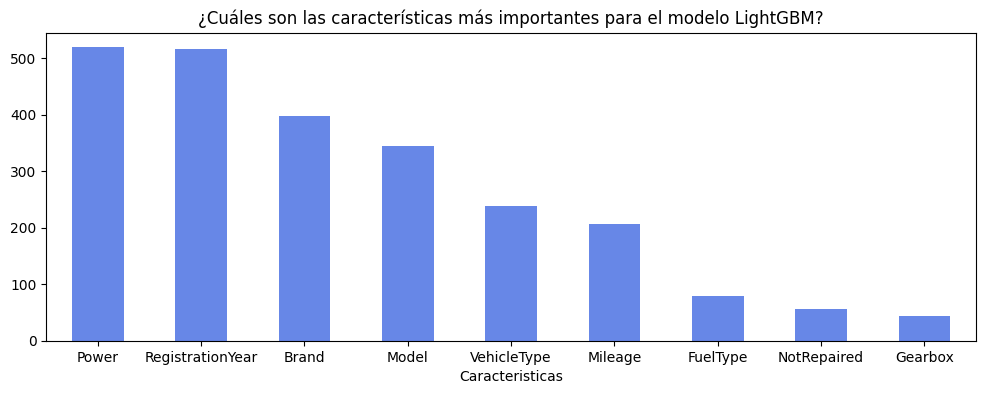

In [49]:
# consulto la importancia de las características del modelo para análisis 
# uso feature_importances_

lgbm_var = pd.DataFrame(model_lgb.feature_importances_, index = features_valid.columns)
lgbm_var = lgbm_var.sort_values(by=[0], ascending = False)

# grafico los resultados de las características
lgbm_var.plot.bar(legend = None,           
                 figsize = (12,4), 
                 rot = 0,
                 xlabel = "Caracteristicas",
                 ylabel = "",
                 title = "¿Cuáles son las características más importantes para el modelo LightGBM?",
                 color = '#4169e1',
                 alpha = 0.8)
plt.show()

**Observación características:**
- Con el análisis de las características podemos entender mejor cómo funciona el modelo de lightGBM.
- Podemos notar que **las características más importantes para el modelo son `Power`,`RegistrationYear` seguidas por  `Brand`.**
- Por otra parte podemos ver que **`FuelType`,`NotRepaired` y `Gearbox` son las menos importantes.**

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy buen complemento!
</div>

## Conclusión

**Se recomienda a la compañía implementar el modelo de LightGBM para la nueva app, ya que esta maximiza la precisión de las predicciones y maximiza la velocidad de predicción y entrenamiento:**

**Hiperparametros:**

- boosting_type = 'gbdt'
- learning_rate = 0.15 
- n_estimators = 80 
- random_state = 12345

**Cual es la calidad de la predicción?**  La calidad es favorable RMSE: 1660 € y R2: 0.88

**Cual es la velocidad de la predicción?** La velocidad de predicción es de ~0.3 s

**Cual es el tiempo requerido para el entrenamiento?** La velocidad de entrenamiento es de ~2s

________________________________________________________________________
**Resumen del proyecto:**

**1) Extracción y preparación de datos:**
En primer lugar se analizaron los datos sobre los vehículos:

**Exploración de datos**
- Se eliminaron valores ausentes de las columnas `VehicleType`, `Gearbox`, `Model`, `FuelType` y `NotRepaired`
- Se eliminaron  247 datos duplicados que correspondian al 0.09% de los datos.
- Se eliminaron valores atípicos donde Price y Power eran 0.

**Codificación y estandarización de datos**
- Se utilizó **codificación one-hot** en las columnas `Gearbox` y `NotRepaired`.
- Se utilizó **etiquetado de datos con OrdinalEncoder()** en las columnas `VehicleType`, `Model`, `FuelType`, `Brand`

**Escalar los datos**
- **Se utilizó MaxAbsScaler() para escalar los datos** de las columnas a usar en el modelo.

**Segmentación de datos**
- Se segmentaron los datos **en 60% para entrenamiento, 20% prueba y 20% validación.**
- Los segmentos de características tienen las columnas: `VehicleType`, `RegistrationYear`, `Gearbox`, `Power`, `Model`, `Mileage`, `FuelType`, `Brand`, `NotRepaired`
- Los segmentos de objetivo solo tienen la columna `Price`.


**2) Entrenamiento del modelo:** 

Se evaluaron diferentes modelos para encontrar la mejor opción para la compañía teniendo en cuenta los requerimientos de precisión y velocidad.

- **Regresión Lineal:** RMSE: 3361 € y R2: 0.50 - **modelo poco preciso (base)**

- **Bosque aleatorio:** RMSE: 1598 € y R2:  0.89 - **el modelo más preciso,  sin embargo es lento (E: 41s y P: 2s)**

- **Potenciador de gradiente:** RMSE: 1843 € y R2: 0.85 - modelo menos acertado que el bosque aleatorio, **sin embargo tiene tiempos mucho más eficientes (E: 28s y P: 0.7s)**

- **LightGBM:** RMSE: 1650 € y R2: 0.88, **mejor modelo precisión/velocidad (E: 2s, P: 0.3s)**

- **CatBoost:** RMSE: 1737 € y R2: 0.87, ligeramente menos acertado que lightGBM, **sin embargo más lento (E: 5s, P: 0.16s)**


**3) Análisis del modelo:**

**Se verificó que LightGBM mantiene la calidad de la predicción/velocidad** que se evidenció con los datos de entrenamiento.

- **RMSE: 1660 € y R2: 0.88**
- **Tiempo de entrenamiento: 1.94s**
- **Tiempo de predicción: 0.3s**

**Análisis de características:**
- **Más importantes:** `Power`,`RegistrationYear` y `Brand`.
- **Menos importantes:** `FuelType`,`NotRepaired` y `Gearbox`.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en orden de ejecución
- [x]  Los datos han sido descargados y preparados
- [x]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos